In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Day 21: Newton-Cotes Formulae

The *Newton-Cotes Formulae* are a set of strategies which try to approximate $\displaystyle{\int_{a}^{b}{f\left(x\right)dx} \approx \sum_{i = 0}^{n}{A_if\left(x_i\right)}}$, where $A_i$ is referred to as a *weight* and the $x_i$ are called *nodal abscissas*. As mentioned in the motivation notebook, Newton-Cotes Formulae include the *left-* and *right-endpoint* methods (using rectangles), the *trapezoidal method*, and others. The image below shows the *trapezoidal method*.

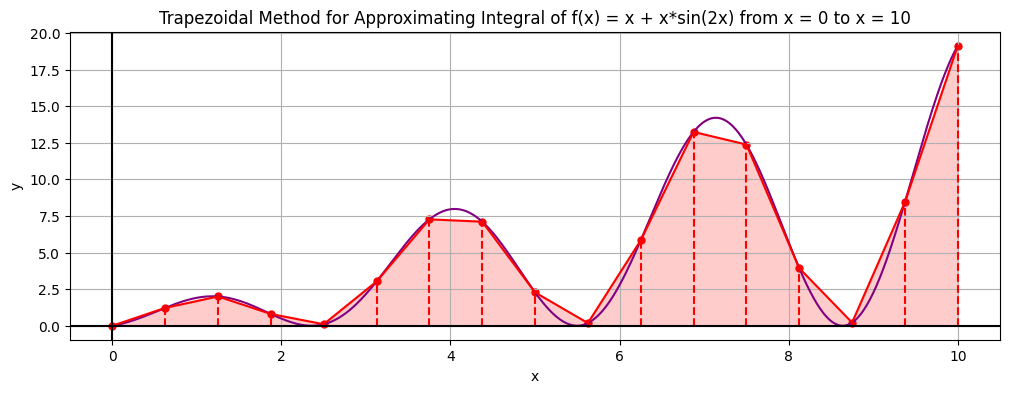

In [ ]:
#@title
x_vals = np.linspace(0, 10, 500)
y_vals = x_vals + x_vals*np.sin(2*x_vals)

subdivisions = 4

x_abscissas = np.linspace(0, 10, 2**subdivisions + 1)
y_abscissas = x_abscissas + x_abscissas*np.sin(2*x_abscissas)

x_next_abscissas = np.linspace(0, 10, 2**(subdivisions + 1) + 1)
y_next_abscissas = x_next_abscissas + x_next_abscissas*np.sin(2*x_next_abscissas)

plt.figure(figsize = (12, 4))
plt.plot(x_vals, y_vals, color = "purple")
plt.plot(x_abscissas, y_abscissas, color = "red")
plt.fill_between(x_abscissas, y_abscissas, color = "red", alpha = 0.2)
plt.scatter(x_abscissas, y_abscissas, color = "red", s = 25)
plt.vlines(x = x_abscissas, ymin = 0, ymax= y_abscissas, color = "red", ls = "--")
#plt.plot(x_next_abscissas, y_next_abscissas, color = "purple")
#plt.fill_between(x_next_abscissas, y_next_abscissas, color = "purple", alpha = 0.2)
#plt.scatter(x_next_abscissas, y_next_abscissas, color = "purple", s = 25)
#plt.vlines(x = x_next_abscissas, ymin = 0, ymax= y_next_abscissas, color = "purple", ls = "--")
plt.grid()
plt.axvline(x = 0, color = "black")
plt.axhline(y = 0, color = "black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trapezoidal Method for Approximating Integral of f(x) = x + x*sin(2x) from x = 0 to x = 10")
plt.show()

In order to approximate $\displaystyle{\int_{a}^{b}{f\left(x\right)}}$, Newton-Cotes Formulae take the following steps:

1. Divide $\left[a, b\right]$ into $n$ equal intervals of width $h = \frac{b-a}{n}$.
2. The *nodal abscissas* are the endpoints of the intervals resulting from the step above. That is, we have nodal abscissas $x_0, x_1, x_2,\cdots, x_n$ where $x_0 = a$ and $x_{i+1} = x_i + h$.
3. Approximate $f\left(x\right)$ by a [perhaps piecewise] polynomial of degree [at most] $n$ that intersects all of the nodes.

## Newton-Cotes Formulas

As a reminder, a Lagrange Polynomial of degree $n$ is defined as

$$P_{n}\left(x\right) = \sum_{i = 0}^{n}{f\left(x_i\right)\ell_i\left(x\right)}$$

where $\ell_i\left(x\right)$ are the *cardinal functions* defined in the Day 8 notebook. From here, we can obtain an approximation for $\displaystyle{\int_{a}^{b}{f\left(x\right)dx}}$ as follows:

\begin{align*} \int_{a}^{b}{f\left(x\right)dx} &\approx \int_{a}^{b}{P_{n}\left(x\right)dx}\\
&= \sum_{i = 0}^{n}{\left[f\left(x_i\right)\int_{a}^{b}{\ell_i\left(x\right)dx}\right]}\\
&= \sum_{i = 0}^{n}{A_if\left(x_i\right)} & (\bigstar)
\end{align*}

where $\displaystyle{A_i = \int_{a}^{b}{\ell_i\left(x\right)dx}}$.

The equations described above are referred to as the Newton-Cotes formulas.

### Trapezoidal Rule

The *Trapezoidal Rule* is obtained by the Newton-Cotes Formula when $n = 1$. In this case, remember that the *cardinal function* $\displaystyle{\ell_0\left(x\right) = \frac{x - x_1}{x_0 - x_1} = \frac{x - b}{h}}$ and $\displaystyle{\ell_1\left(x\right) = \frac{x - x_0}{x_1 - x_0} = \frac{x - a}{h}}$. From here, we can obtain

\begin{align*} A_0 &= \frac{1}{h}\int_{a}^{b}{\left(x - b\right)dx}\\
&= \frac{1}{2h}\left(b - a\right)^2\\
&= \frac{h}{2}\\
A_1 &= \frac{1}{h}\int_{a}^{b}{\left(x - a\right)dx}\\
&= \frac{1}{2h}\left(b - a\right)^2\\
&= \frac{h}{2}
\end{align*}

Plugging these weights into the $(\bigstar)$ equation from above gives us that

\begin{align*} \int_{a}^{b}{f\left(x\right)dx} &\approx \sum_{i = 0}^{1}{\frac{h}{2}f\left(x_i\right)}\\
&= \frac{h}{2}\left[f\left(a\right) + f\left(b\right)\right]
\end{align*}

The error in approximation using the *Trapezoidal Rule* is

\begin{align*} E &= \int_{a}^{b}{f\left(x\right)dx} - \frac{h\left[f\left(a\right) + f\left(b\right)\right]}{2}
\end{align*}

From Section 3.2 in our textbook, we can see that the error in interpolating a function with an $n^{th}$-degree polynomial is given by

\begin{align*}f\left(x\right) - P_{n}\left(x\right) &= \frac{\left(x - x_0\right)\left(x - x_1\right)\cdots\left(x - x_n\right)}{\left(n+1\right)!}f^{\left(n+1\right)}\left(\xi\right)\\
\implies \int_{a}^{b}{f\left(x\right) - P_{n}\left(x\right)dx} &= \int_{a}^{b}{\frac{\left(x - x_0\right)\left(x - x_1\right)\cdots\left(x - x_n\right)}{\left(n+1\right)!}f^{\left(n+1\right)}\left(\xi\right)dx}
\end{align*}

Since we are using a linear function as our interpolant, we have

\begin{align*}f\left(x\right) - P_{1}\left(x\right) &= \frac{\left(x - x_0\right)\left(x - x_1\right)}{2!}f''\left(\xi\right)\\
\implies \int_{a}^{b}{f\left(x\right) - P_{1}\left(x\right)dx} &= \int_{a}^{b}{\frac{\left(x - x_0\right)\left(x - x_1\right)}{2!}f''\left(\xi\right)dx}\\
&= \int_{a}^{b}{\frac{\left(x - a\right)\left(x - b\right)}{2!}f''\left(\xi\right)dx}\\
&= \frac{1}{2}f''\left(\xi\right)\int_{a}^{b}{\left(x^2
 - \left(a + b\right)x + ab\right)dx}\\
&= \frac{1}{2}f''\left(\xi\right)\left[\left(\frac{x^3}{3}
- \frac{\left(a + b\right)x^2}{2} + abx\right)\mid_{a}^{b}\right]\\
&= \frac{1}{2}f''\left(\xi\right)\left[\left(\frac{b^3}{3} - \frac{ab^2}{2} - \frac{b^3}{2} + ab^2\right) - \left(\frac{a^3}{3} - \frac{a^3}{2} - \frac{a^2b}{2} + a^2b\right)\right]\\
&= \frac{1}{2}f''\left(\xi\right)\left[-\frac{b^3}{6} + \frac{ab^2}{2} + \frac{a^3}{6} - \frac{a^2b}{2}\right]\\
&= \frac{1}{12}f''\left(\xi\right)\left[a^3 - 3a^2b + 3ab^2 - b^3\right]\\
&= \frac{1}{12}f''\left(\xi\right)\left(a - b\right)^3\\
&= \frac{\left(a - b\right)^3}{12}f''\left(\xi\right)\\
&= \frac{-\left(b - a\right)^3}{12}f''\left(\xi\right)\\
&= \frac{-h^3}{12}f''\left(\xi\right)
\end{align*}

### Composite Trapezoidal Rule

The *Trapezoid Rule* cited about approximates the area under $f\left(x\right)$ along $\left[a, b\right]$ by a single trapezoid. The trapezoid rule that we usually think of (and the one from the plot near the beginning of this notebook) break up the interval $\left[a, b\right]$ into many sub-intervals and use a trapezoid on each interval, summing the areas of all of the trapezoids together in order to approximate the area. In doing this, we get the *Composite* (or *Generalized*) *Trapezoid Rule*.

$$\int_{a}^{b}{f\left(x\right)dx} \approx \sum_{i = 0}^{n-1}{\frac{f\left(x_i\right) + f\left(x_{i+1}\right)}{2}\Delta x}$$

From what we computed above, the truncation error in approximating the integral on each individual sub-interval is

\begin{align*} E_i &\approx \frac{-h^3}{12}f''\left(\xi_i\right)\\
\implies E &\approx \sum_{i = 0}^{n-1}{\frac{-h^3}{12}f''\left(\xi_i\right)}\\
&= \frac{-h^3}{12}\sum_{i=0}^{n-1}{f''\left(\xi_i\right)}
\end{align*}

We can substitute $\displaystyle{\sum_{i=0}^{n-1}{f''\left(\xi_i\right)} = n\bar{f''}}$, where $\bar{f''}$ is the average of the second derivatives on our subintervals. As long as $f''$ is continuous along the interval $\left[a,b\right]$, then the Mean Value Theorem guarantees the existence of a $\xi\in\left[a, b\right]$ so that $\bar{f''} = f''\left(\xi\right)$. Doing this allows us to rewrite our estimate for the total approximation error $E$.

\begin{align*} E &\approx \frac{-h^3}{12}\sum_{i=0}^{n-1}{f''\left(\xi_i\right)}\\
&=\frac{-h^3}{12}n\bar{f''}\\
&= \frac{-h^3}{12}\left(\frac{b - a}{h}\right)f''\left(\xi\right)\\
&= \frac{-\left(b - a\right)h^2}{12}f''\left(\xi\right)
\end{align*}

Unfortunately, this error bound isn't exactly of the form $ch^p$ because $f''\left(\xi\right)$ isn't independent of $h$. If $f$ and its derivatives are finite on $\left(a, b\right)$, then it can be shown that

$$E \approx c_1h^2 + c_2h^4 + c_3h^6 + \cdots$$

### Recursive Trapezoidal Rule

Before we attempt to write a routine to approximate a definite integral using the *Composite Trapezoid Rule*, it will be worth attempting to construct a general form for the calculations being done. Identifying patterns will help us write a general routine.

Consider the composite trapezoidal rule using $2^{k-1}$ subintervals. If $h$ is increased by $1$, the number of subintervals is doubled. For convenience, let $H = b - a$, and notice the following:

+ If $k = 1$, we have just a single interval, and the estimate ($I_1$) for the area using the trapezoidal rule is

\begin{align*}\int_{a}^{b}{f\left(x\right)dx} \approx \left[f\left(a\right) + f\left(b\right)\right]\frac{H}{2}
\end{align*}

+ If $k = 2$, we have two sub-intervals and the estimate ($I_2$) for the area is

\begin{align*}\int_{a}^{b}{f\left(x\right)dx} &\approx \left[f\left(a\right) + 2f\left(a + \frac{H}{2}\right) + f\left(b\right)\right]\frac{H}{4}\\
&= \frac{1}{2}\left(\left[f\left(a\right) + f\left(b\right)\right]\frac{H}{2}\right) + f\left(a + \frac{H}{2}\right)\frac{H}{2}\\
&= \frac{1}{2}I_1 + f\left(a + \frac{H}{2}\right)\frac{H}{2}
\end{align*}

+ If $k = 3$, we have four sub-intervals and the estimate ($I_3$) for the area is

\begin{align*} \int_{a}^{b}{f\left(x\right)dx} &\approx \left[f\left(a\right) + 2f\left(a + \frac{H}{4}\right) + 2f\left(a + \frac{H}{2}\right) + 2f\left(a + \frac{3H}{4}\right) + f\left(b\right)\right]\frac{H}{8}\\
&= \frac{1}{2}\left[f\left(a\right) + 2f\left(a + \frac{H}{2}\right) + f\left(b\right)\right]\frac{H}{4} + \left[2f\left(a + \frac{H}{4}\right) + + 2f\left(a + \frac{3H}{4}\right)\right]\frac{H}{8}\\
&= \frac{1}{2}I_2 + \left[f\left(a + \frac{H}{4}\right) + f\left(a + \frac{3H}{4}\right)\right]\frac{H}{4}
\end{align*}

+ For general $k$, we'll have $2^{k-1}$ subintervals and the estimate ($I_k$) for the area will be

\begin{align*} \frac{1}{2}I_{k-1} + \frac{H}{2^{k-1}}\sum_{i = 0}^{2^{k-2}}{f\left(a + \frac{\left(2i - 1\right)H}{2^{k-1}}\right)}
\end{align*}

Using this recursive rule doesn't actually require any additional operations beyond calculating the area using the composite trapezoidal rule directly. It does, however, allow us to monitor the convergence of the total area estimate by tracking changes between $I_{k-1}$ and $I_k$. We can terminate the process when $\left|I_{k-1} - I_k\right| < \text{tolerance}$.

We are now ready to write a recursive `trapezoidMethod()` routine.

In [ ]:
def trapezoid(f, a, b, Iold, k):
  if k == 1:
    Inew = ___
  else:
    n = ___
    h = ___
    x = ___
    sum = 0.0
    for i in range(n):
      sum = sum + ___
      x = x + ___

    Inew = ___ + ___

  return ___

def trapezoidMethod(f, a, b, k):
  Iold = ___

  for i in range(2, k + 1):
    Inew = ___
    diff = Inew - Iold
    print("The difference in consecutive estimates was ", ___)
    Iold = ___

  return ___

**Example:** The picture at the beginning of this notebook shows the trapezoidal rule with $16$ subintervals being used to approximate $\displaystyle{\int_{0}^{10}{x + x\sin\left(2x\right)dx}}$. Use the routine defined above to compute the estimated area.

> *Solution.*

### Simpson's Rules

Simpson's Rules can be obtained from the Newton-Cotes Formulae by letting $n = 2$ using a parabolic interpolant through consecutive triplets of points. For a single set of three data points, we can estimate the area as

$$I = \left[f\left(a\right) + 4f\left(\frac{a + b}{2}\right) + f\left(b\right)\right]\frac{h}{3}$$

Similar to the approach we took with the trapezoidal rule, we obtain *composite Simpson's rules* by summing the single-interval area estimates over the subintervals. Since we are using three consecutive data points to build the parabolic interpolant, we consume two subintervals at a time. That is, the estimated area underneath $f\left(x\right)$ between $x_i$ and $x_{i+2}$ is given by

\begin{align*} \int_{x_i}^{x_{i+2}}{f\left(x\right)dx} &\approx \left[f\left(x_i\right) + 4f\left(x_{i+1}\right) + f\left(x_{i+2}\right)\right]\frac{h}{3}\\
\implies \int_{a}^{b}{f\left(x\right)dx} &\approx \sum_{i = 0}^{\lfloor\frac{n}{2}\rfloor}{\left[\int_{x_{2i}}^{2\left(i + 1\right)}{f\left(x\right)dx}\right]}\\
&= \left[f\left(x_0\right) + 4f\left(x_1\right) + 2f\left(x_2\right) + 4f\left(x_3\right) + \cdots + 2f\left(x_{n-2}\right) + 4f\left(x_{n-1}\right) + f\left(x_n\right)\right]\frac{h}{3}
\end{align*}

While Simpson's Rule is widely known, it isn't as robust as the *trapezoidal rule* and we'll see *Romberg Integration* in the next notebook which improves the efficiency of the trapezoidal rule we saw earlier in this notebook.

The error estimate for the *composite Simpson's Rule* is

$$E \approx \frac{\left(b - a\right)h^4}{180}f^{\left(4\right)}\left(\xi\right)$$

The estimate is exact if $f\left(x\right)$ is a polynomial of degree three or less since $f^{\left(4\right)}\left(x\right) = 0$ in those cases.

***

## Summary

In this notebook we developed the *Newton-Cotes Formulae*. These are a set of approaches to numerical integration satisfying:

\begin{align*} \int_{a}^{b}{f\left(x\right)dx} &\approx \sum_{i = 0}^{n}{A_if\left(x_i\right)}\\
A_i &= \int_{a}^{b}{\ell_i\left(x\right)dx}
\end{align*}

We mentioned that techniques such as *left-hand* and *right-hand Riemann Sums*, the *Trapezoidal Rule*, and *Simpson's Rule* all fall under the category of Newton-Cotes Formulae. In particular, we implemented a routine `trapeoidMethod(f, a, b, k)` which can be used to approximate $\displaystyle{\int_{a}^{b}{f\left(x\right)dx}}$ using $2^{k-1}$ sub-intervals.

In the next notebook, we'll see how to combine the *Trapezoidal Rule* with *Richardson Extrapolation* to improve efficiency in a technique called *Romberg Integration*.